In [1]:
cd

C:\Users\abc


In [2]:
cd "C:\Users\abc\ud120-projects\final_project"

C:\Users\abc\ud120-projects\final_project


In [3]:
# Common imports
import numpy as np
import os
import sys
import pickle
sys.path.append("../tools/")

# to make this notebook's output stable across runs
#np.random.seed(42)

from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data

C:\Users\abc\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
with open("final_project_dataset.pkl","r") as data_file:
    data_dict = pickle.load(data_file)  

In [5]:
features_list = ['poi', 'salary', 'to_messages', 'deferral_payments', 'total_payments',
                 'loan_advances', 'bonus', 'restricted_stock_deferred',
                 'deferred_income', 'total_stock_value', 'expenses', 'from_poi_to_this_person',
                 'exercised_stock_options', 'from_messages', 'other', 'from_this_person_to_poi',
                 'long_term_incentive', 'shared_receipt_with_poi', 'restricted_stock', 'director_fees']


In [6]:
from pprint import pprint
#Sample data for one of the Top executives - Jeffrey Skilling
pprint(data_dict["SKILLING JEFFREY K"])

#Number of people in the datasets

print "Total number of people in the dataset: " + str(len(data_dict))

#Number of features available in the dataset

print "Total number of features in the dataset: " + str(len(data_dict["SKILLING JEFFREY K"]))

{'bonus': 5600000,
 'deferral_payments': 'NaN',
 'deferred_income': 'NaN',
 'director_fees': 'NaN',
 'email_address': 'jeff.skilling@enron.com',
 'exercised_stock_options': 19250000,
 'expenses': 29336,
 'from_messages': 108,
 'from_poi_to_this_person': 88,
 'from_this_person_to_poi': 30,
 'loan_advances': 'NaN',
 'long_term_incentive': 1920000,
 'other': 22122,
 'poi': True,
 'restricted_stock': 6843672,
 'restricted_stock_deferred': 'NaN',
 'salary': 1111258,
 'shared_receipt_with_poi': 2042,
 'to_messages': 3627,
 'total_payments': 8682716,
 'total_stock_value': 26093672}
Total number of people in the dataset: 146
Total number of features in the dataset: 21


In [7]:
print "Total number of features in the data set", str(len(data_dict))
print "Total number of people in dataset",str(len(data_dict["SKILLING JEFFREY K"]))

Total number of features in the data set 146
Total number of people in dataset 21


In [8]:
def poi_count(file):
    count = 0
    for data in file:
        if file[data]['poi'] == True:
            count += 1
    print "Number of POI's in dataset "  + str(count)  
poi_count(data_dict)

Number of POI's in dataset 18


97343619.0


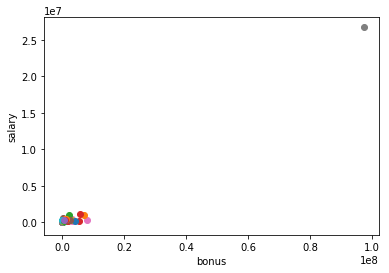

In [9]:
#Detect outliers and remove them
import matplotlib.pyplot as plt
%matplotlib inline
features = ["bonus","salary"]
data = featureFormat(data_dict,features)
print(data.max())
for point in data:
    bonus = point[0]
    salary = point[1]
    plt.scatter(bonus,salary)
plt.xlabel("bonus")
plt.ylabel("salary")
plt.show()

In [10]:
# Maximum Salary
from pprint import pprint
outliers_salary = []
for key in data_dict:
    val = data_dict[key]['salary']
    if val == 'NaN':
        continue
    outliers_salary.append((key,int(val))) 

pprint (sorted(outliers_salary,key = lambda x:x[1],reverse = True)[:2])   
    

[('TOTAL', 26704229), ('SKILLING JEFFREY K', 1111258)]


In [11]:
# Maximum Bonus
outliers_bonus = []
for key in data_dict:
    val = data_dict[key]['bonus']
    if val == 'NaN':
        continue
    outliers_bonus.append((key,int(val)))
pprint(sorted(outliers_bonus,key = lambda x:x[1],reverse = True)[:2])    

[('TOTAL', 97343619), ('LAVORATO JOHN J', 8000000)]


Removing Total and Travel Agency in the Park outliers

In [12]:
data_dict.pop('TOTAL',0)
data_dict.pop('THE TRAVEL AGENCY IN THE PARK',0)

{'bonus': 'NaN',
 'deferral_payments': 'NaN',
 'deferred_income': 'NaN',
 'director_fees': 'NaN',
 'email_address': 'NaN',
 'exercised_stock_options': 'NaN',
 'expenses': 'NaN',
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 'NaN',
 'long_term_incentive': 'NaN',
 'other': 362096,
 'poi': False,
 'restricted_stock': 'NaN',
 'restricted_stock_deferred': 'NaN',
 'salary': 'NaN',
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 362096,
 'total_stock_value': 'NaN'}

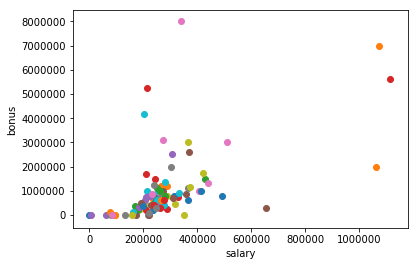

In [13]:
features = ["salary","bonus"]
data = featureFormat(data_dict,features)
for point in data:
    salary = point[0]
    bonus = point[1]
    plt.scatter(salary,bonus)
plt.xlabel("salary")
plt.ylabel("bonus")
plt.show()    

In [14]:
import pandas as pd
df_values = pd.DataFrame.from_records(list(data_dict.values()))
df_values.head()

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
0,600000,NaN,NaN,NaN,mark.metts@enron.com,NaN,94299,29,38,1,...,NaN,1740,False,585062,NaN,365788,702,807,1061827,585062
1,1200000,1295738,-1386055,NaN,NaN,6680544,11200,NaN,NaN,NaN,...,1586055,2660303,False,3942714,NaN,267102,NaN,NaN,5634343,10623258
2,350000,NaN,-400729,NaN,steven.elliott@enron.com,4890344,78552,NaN,NaN,NaN,...,NaN,12961,False,1788391,NaN,170941,NaN,NaN,211725,6678735
3,NaN,NaN,NaN,NaN,bill.cordes@enron.com,651850,NaN,12,10,0,...,NaN,NaN,False,386335,NaN,NaN,58,764,NaN,1038185
4,1500000,NaN,-3117011,NaN,kevin.hannon@enron.com,5538001,34039,32,32,21,...,1617011,11350,True,853064,NaN,243293,1035,1045,288682,6391065


In [15]:
df_keys = pd.Series(list(data_dict.keys()))
df_keys.head()

0          METTS MARK
1       BAXTER JOHN C
2      ELLIOTT STEVEN
3    CORDES WILLIAM R
4      HANNON KEVIN P
dtype: object

In [16]:
print df_values.isnull().sum()

bonus                        0
deferral_payments            0
deferred_income              0
director_fees                0
email_address                0
exercised_stock_options      0
expenses                     0
from_messages                0
from_poi_to_this_person      0
from_this_person_to_poi      0
loan_advances                0
long_term_incentive          0
other                        0
poi                          0
restricted_stock             0
restricted_stock_deferred    0
salary                       0
shared_receipt_with_poi      0
to_messages                  0
total_payments               0
total_stock_value            0
dtype: int64


In [17]:
#We will convert them to numpy nan and then to zero.
import numpy as np

df_values.replace(to_replace = 'NaN',value = np.nan,inplace = True)
df_values.isnull().sum()


bonus                         63
deferral_payments            106
deferred_income               96
director_fees                128
email_address                 33
exercised_stock_options       43
expenses                      50
from_messages                 58
from_poi_to_this_person       58
from_this_person_to_poi       58
loan_advances                141
long_term_incentive           79
other                         53
poi                            0
restricted_stock              35
restricted_stock_deferred    127
salary                        50
shared_receipt_with_poi       58
to_messages                   58
total_payments                21
total_stock_value             19
dtype: int64

In [18]:
df_values.replace(to_replace = np.nan,value = 0,inplace=True)
df_values.head()

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
0,600000.0,0.0,0.0,0.0,mark.metts@enron.com,0.0,94299.0,29.0,38.0,1.0,...,0.0,1740.0,False,585062.0,0.0,365788.0,702.0,807.0,1061827.0,585062.0
1,1200000.0,1295738.0,-1386055.0,0.0,0,6680544.0,11200.0,0.0,0.0,0.0,...,1586055.0,2660303.0,False,3942714.0,0.0,267102.0,0.0,0.0,5634343.0,10623258.0
2,350000.0,0.0,-400729.0,0.0,steven.elliott@enron.com,4890344.0,78552.0,0.0,0.0,0.0,...,0.0,12961.0,False,1788391.0,0.0,170941.0,0.0,0.0,211725.0,6678735.0
3,0.0,0.0,0.0,0.0,bill.cordes@enron.com,651850.0,0.0,12.0,10.0,0.0,...,0.0,0.0,False,386335.0,0.0,0.0,58.0,764.0,0.0,1038185.0
4,1500000.0,0.0,-3117011.0,0.0,kevin.hannon@enron.com,5538001.0,34039.0,32.0,32.0,21.0,...,1617011.0,11350.0,True,853064.0,0.0,243293.0,1035.0,1045.0,288682.0,6391065.0


Feature Engineering

In [19]:
my_features = features_list
my_dataset = data_dict
print my_features

['poi', 'salary', 'to_messages', 'deferral_payments', 'total_payments', 'loan_advances', 'bonus', 'restricted_stock_deferred', 'deferred_income', 'total_stock_value', 'expenses', 'from_poi_to_this_person', 'exercised_stock_options', 'from_messages', 'other', 'from_this_person_to_poi', 'long_term_incentive', 'shared_receipt_with_poi', 'restricted_stock', 'director_fees']


In [20]:
from sklearn import preprocessing
from sklearn import cross_validation
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)
scaler = preprocessing.MinMaxScaler()
features = scaler.fit_transform(features)
features_train,features_test,labels_train,labels_test = cross_validation.train_test_split(features,labels, test_size=0.3, 
                                                                                          random_state=42)
clf = DecisionTreeClassifier(max_depth = 5)
clf.fit(features_train,labels_train)
pred = clf.predict(features_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(labels_test,pred)
print("Decision Tree Classifier: ")
print "Accuracy: " + str(accuracy)
print "Precision Score: " + str(precision_score(labels_test,pred))
print "Recall Score: " + str(recall_score(labels_test,pred))

Decision Tree Classifier: 
Accuracy: 0.837209302326
Precision Score: 0.0
Recall Score: 0.0


So we see before any feature engineering, our Decision Tree classifier is giving us an accuracy of 83.72% with Precision score and Recall Scores of 0.25 and 0.2 respectively

# Feature Engineering


Now let's add some new features of interest to the list of the features. I will make a function to do that.

In [21]:
#Creating new features  for email 
def poi_messages(data_dict, my_features):
    global features_list
    fields = ['to_messages', 'from_messages',
              'from_poi_to_this_person', 'from_this_person_to_poi']
    for record in data_dict:
        person = data_dict[record]
        is_valid = True
        for field in fields:
            if person[field] == 'NaN':
                is_valid = False
        if is_valid:
            total_messages = person['to_messages']+ person['from_messages']
            total_poi_messages = person['from_poi_to_this_person'] + person['from_this_person_to_poi']  
            person['total_poi_messages'] = float(total_poi_messages) / total_messages
        else:
            person['total_poi_messages'] = 'NaN'
    features_list += ['total_poi_messages']        
def add_fraction_to_poi(data_dict, features_list):
    """ mutates data dict to add proportion of email fraction_to_poi """
    fields = ['from_messages', 'from_this_person_to_poi']
    for record in data_dict:
        person = data_dict[record]
        is_valid = True
        for field in fields:
            if person[field] == 'NaN':
                is_valid = False
        if is_valid:
            total_messages = person['from_messages']
            poi_messages =   person['from_this_person_to_poi']
            person['fraction_to_poi'] = float(poi_messages) / total_messages
        else:
            person['fraction_to_poi'] = 'NaN'
    features_list += ['fraction_to_poi']


def add_fraction_from_poi(data_dict, features_list):
    """ mutates data dict to add proportion of email fraction_from_poi """
    fields = ['to_messages', 'from_poi_to_this_person']
    for record in data_dict:
        person = data_dict[record]
        is_valid = True
        for field in fields:
            if person[field] == 'NaN':
                is_valid = False
        if is_valid:
            total_messages = person['to_messages']
            poi_messages =   person['from_poi_to_this_person']
            person['fraction_from_poi'] = float(poi_messages) / total_messages
        else:
            person['fraction_from_poi'] = 'NaN'
    features_list += ['fraction_from_poi']


poi_messages(data_dict, my_features)
add_fraction_to_poi(data_dict, my_features)
add_fraction_from_poi(data_dict, my_features)
print my_features

['poi', 'salary', 'to_messages', 'deferral_payments', 'total_payments', 'loan_advances', 'bonus', 'restricted_stock_deferred', 'deferred_income', 'total_stock_value', 'expenses', 'from_poi_to_this_person', 'exercised_stock_options', 'from_messages', 'other', 'from_this_person_to_poi', 'long_term_incentive', 'shared_receipt_with_poi', 'restricted_stock', 'director_fees', 'total_poi_messages', 'fraction_to_poi', 'fraction_from_poi']


In [22]:
# creating a new feature for finance
def total_finance(data_dict, my_features):
    global features_list
    fields = ["bonus", "total_stock_value", "salary" ,"total_payments", "long_term_incentive"]
    for record in data_dict:
        person = data_dict[record]
        is_valid = True
        for field in fields:
            if person[field] == "NaN":
                is_valid = False
        if is_valid:
            person["wealth"] = person["bonus"] +person["total_stock_value"]+person["salary"]+person["total_payments"]+person["long_term_incentive"]
        else:
            person["wealth"] = "NaN"
    features_list += ["wealth"]
    
total_finance(data_dict, my_features)
print my_features

['poi', 'salary', 'to_messages', 'deferral_payments', 'total_payments', 'loan_advances', 'bonus', 'restricted_stock_deferred', 'deferred_income', 'total_stock_value', 'expenses', 'from_poi_to_this_person', 'exercised_stock_options', 'from_messages', 'other', 'from_this_person_to_poi', 'long_term_incentive', 'shared_receipt_with_poi', 'restricted_stock', 'director_fees', 'total_poi_messages', 'fraction_to_poi', 'fraction_from_poi', 'wealth']


# Classifier's Result after Feature Engineering

In [23]:
data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)
scaler = preprocessing.MinMaxScaler()
features = scaler.fit_transform(features)
features_train,features_test,labels_train,labels_test = cross_validation.train_test_split(features,labels, test_size=0.3, 
                                                                                          random_state=42)
clf = DecisionTreeClassifier(max_depth = 5)
clf.fit(features_train,labels_train)
pred = clf.predict(features_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(labels_test,pred)
print("Decision Tree Classifier: ")
print "Accuracy: " + str(accuracy)
print "Precision Score: " + str(precision_score(labels_test,pred))
print "Recall Score: " + str(recall_score(labels_test,pred))

Decision Tree Classifier: 
Accuracy: 0.837209302326
Precision Score: 0.25
Recall Score: 0.2


In [24]:
from sklearn.feature_selection import SelectKBest
from sklearn import preprocessing
from sklearn import cross_validation
def get_k_best(enron_data, features_list, k):
    """ runs scikit-learn's SelectKBest feature selection
        returns dict where keys=features, values=scores
    """
    data = featureFormat(data_dict, features_list)
    labels, features = targetFeatureSplit(data)

    k_best = SelectKBest(k=k)
    k_best.fit(features, labels)
    scores = k_best.scores_
    unsorted_pairs = zip(features_list[1:], scores)
    sorted_pairs = list(reversed(sorted(unsorted_pairs, key=lambda x: x[1])))
    k_best_features = dict(sorted_pairs[:k])
    print "{0} best features: {1}\n".format(k, k_best_features.keys())
    print k_best_features
    return k_best_features

target_label = 'poi'
num_features = 7 # 11 best features
top_features = get_k_best(data_dict, features_list, num_features)
print top_features
my_feature_list = [target_label] + top_features.keys()
# print my_feature_list

print "{0} selected features: {1}\n".format(len(my_feature_list) - 1, my_feature_list[1:])

features_list = my_feature_list

7 best features: ['salary', 'wealth', 'bonus', 'total_stock_value', 'fraction_to_poi', 'exercised_stock_options', 'deferred_income']

{'salary': 18.289684043404513, 'wealth': 14.601602473775934, 'bonus': 20.792252047181535, 'total_stock_value': 24.182898678566879, 'fraction_to_poi': 16.409712548035799, 'exercised_stock_options': 24.815079733218194, 'deferred_income': 11.458476579280369}
{'salary': 18.289684043404513, 'wealth': 14.601602473775934, 'bonus': 20.792252047181535, 'total_stock_value': 24.182898678566879, 'fraction_to_poi': 16.409712548035799, 'exercised_stock_options': 24.815079733218194, 'deferred_income': 11.458476579280369}
7 selected features: ['salary', 'wealth', 'bonus', 'total_stock_value', 'fraction_to_poi', 'exercised_stock_options', 'deferred_income']



# Extract features and labels from dataset for local testing 

In [25]:
features_list = ["poi","fraction_from_poi", "fraction_to_poi","shared_receipt_with_poi"]

In [26]:
data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)

# Scaling the features by MinMaxScaler from Sklearn preprocessing module

In [27]:
scaler = preprocessing.MinMaxScaler()
features = scaler.fit_transform(features)

# Splitting the data into train data(70%) and test data(30%)

In [28]:
features_train,features_test,labels_train,labels_test = cross_validation.train_test_split(features,labels, test_size=0.3, 
                                                                        random_state=42)

# Using different Machine Learning Classifiers.


# Decision Tree Classifier

In [29]:
clf = DecisionTreeClassifier(max_depth = 5)
clf.fit(features_train,labels_train)
pred = clf.predict(features_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(labels_test,pred)
print("Decision Tree Classifier: ")
print "Accuracy: " + str(accuracy)
print "Precision Score: " + str(precision_score(labels_test,pred))
print "Recall Score: " + str(recall_score(labels_test,pred))

Decision Tree Classifier: 
Accuracy: 0.961538461538
Precision Score: 1.0
Recall Score: 0.5


# Naive Bayes Classifier

In [30]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(features_train,labels_train)
pred = clf.predict(features_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(labels_test,pred)
print("Naive Bayes Classifier: ")
print "Accuracy: " + str(accuracy)
print "Precision Score: " + str(precision_score(labels_test,pred))
print "Recall Score: " + str(recall_score(labels_test,pred))

Naive Bayes Classifier: 
Accuracy: 0.923076923077
Precision Score: 0.0
Recall Score: 0.0


C:\Users\abc\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


# AdaBoost Classifier

In [31]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier()
clf.fit(features_train,labels_train)
pred = clf.predict(features_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(labels_test,pred)
print("Adaboost Classifier: ")
print "Accuracy: " + str(accuracy)
print "Precision Score: " + str(precision_score(labels_test,pred))
print "Recall Score: " + str(recall_score(labels_test,pred))

Adaboost Classifier: 
Accuracy: 0.961538461538
Precision Score: 1.0
Recall Score: 0.5


# Standard Vector Machine (rbf) Classifier

In [32]:
from sklearn.svm import SVC
clf = SVC(gamma=3, C=2)
clf.fit(features_train,labels_train)
pred = clf.predict(features_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(labels_test,pred)
print("SVM Classifier: ")
print "Accuracy: " + str(accuracy)
print "Precision Score: " + str(precision_score(labels_test,pred))
print "Recall Score: " + str(recall_score(labels_test,pred))

SVM Classifier: 
Accuracy: 0.923076923077
Precision Score: 0.0
Recall Score: 0.0


# K Nearest Neighbours Classifier

In [33]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(3)
clf.fit(features_train,labels_train)
pred = clf.predict(features_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(labels_test,pred)
print("kNN Classifier: ")
print "Accuracy: " + str(accuracy)
print "Precision Score: " + str(precision_score(labels_test,pred))
print "Recall Score: " + str(recall_score(labels_test,pred))

kNN Classifier: 
Accuracy: 0.846153846154
Precision Score: 0.0
Recall Score: 0.0


In [34]:
from sklearn import grid_search
from sklearn.metrics import f1_score

C:\Users\abc\Anaconda2\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [35]:
cv = cross_validation.StratifiedShuffleSplit(labels, n_iter=10)


def scoring(estimator, features_test, labels_test):
    labels_pred = estimator.predict(features_test)
    p = precision_score(labels_test, labels_pred, average='micro')
    r = recall_score(labels_test, labels_pred, average='micro')
    if p > 0.3 and r > 0.3:
        return f1_score(labels_test, labels_pred, average='macro')
    return 0

# Recursive Feature Selection

C:\Users\abc\Anaconda2\lib\site-packages\sklearn\cross_validation.py:552: Warning: The least populated class in y has only 14 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=50.
  % (min_labels, self.n_folds)), Warning)


Optimal number of features : 2
[False  True  True]


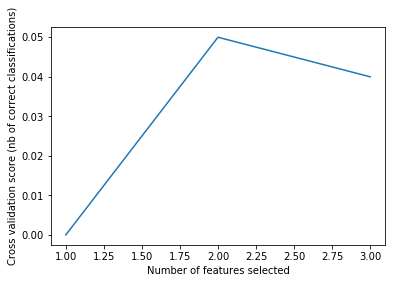

In [36]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.cross_validation import StratifiedKFold
from sklearn.feature_selection import RFECV
clf = DecisionTreeClassifier(max_depth = 5)
rfecv = RFECV(estimator=clf, step=1, cv=StratifiedKFold(labels, 50),
          scoring='precision')
rfecv.fit(features, labels)
print("Optimal number of features : %d" % rfecv.n_features_)
print rfecv.support_
features=features[:,rfecv.support_]
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

Decision Tree Classifier Tuning

In [37]:
from time import time
t0 = time()
parameters = {'max_depth': [1, 2, 3, 4, 5, 6, 8, 9, 10], 'min_samples_split':[2,3,4,5,6,7,8,9,10],
              'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8], 'criterion': ('gini', 'entropy')}

decTree_clf = DecisionTreeClassifier()
decTreeclf = grid_search.GridSearchCV(decTree_clf, parameters, scoring=scoring, cv=cv)

decTreeclf.fit(features, labels)
print decTreeclf.best_estimator_
print decTreeclf.best_score_
print 'Processing time:', round(time() - t0, 3), 's'

C:\Users\abc\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=7,
            min_samples_split=4, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
0.887857142857
Processing time: 71.96 s


# Classifier Validation

In [38]:
##DecisionTreeClassifier Validation 1 (StratifiedShuffleSplit, folds = 1000)
from tester import test_classifier
t0 = time()
decTree_best_clf = decTreeclf.best_estimator_
test_classifier(decTree_best_clf, my_dataset, features_list)
print 'Processing time:', round(time() - t0, 3), 's'

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=7,
            min_samples_split=4, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
	Accuracy: 0.85833	Precision: 0.42682	Recall: 0.80200	F1: 0.55714	F2: 0.68209
	Total predictions: 9000	True positives:  802	False positives: 1077	False negatives:  198	True negatives: 6923

Processing time: 0.803 s


In [39]:
##DecisionTreeClassifier Validation 2  (Cross validation)

from sklearn.model_selection import cross_val_score
t0 = time()
decTree_best_clf = decTreeclf.best_estimator_
scores = cross_val_score(decTree_best_clf, features, labels, cv=5,scoring = 'accuracy')
print("Accuracy and Deviation: " + str((scores.mean(), scores.std() * 2)))
print 'Processing time:', round(time() - t0, 3), 's'
test_classifier(decTree_best_clf, my_dataset, features_list)

Accuracy and Deviation: (0.84738562091503267, 0.10525920072782949)
Processing time: 0.015 s
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=7,
            min_samples_split=4, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
	Accuracy: 0.85844	Precision: 0.42705	Recall: 0.80200	F1: 0.55733	F2: 0.68220
	Total predictions: 9000	True positives:  802	False positives: 1076	False negatives:  198	True negatives: 6924

